# Telecom Churn - ML Group Case Study

### Business Problem Overview

    In the telecom industry, customers are able to choose from multiple service providers and actively switch 
    from one operator to another. 
    In this highly competitive market, the telecommunications industry experiences 
    an average of 15-25% annual churn rate. 

    Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, 
    customer retention has now become even more important than customer acquisition.

### 1. Importing Libraries:-

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import pandas_profiling
%matplotlib inline

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\lenovo\Anaconda3\lib\runpy.py", line 85, i

### 2. Data Preparation:-

#### Data Understanding:-

    In this project we will analyse customer-level data of a leading telecom firm, build predictive models 
    to identify customers at high risk of churn and identify the main indicators of churn.

    Features of the dataset at a glance:-

    A. There are 226 columns and 0 to 99999 entries in each columns.
    B. There of 179 columns of float64 type , 35 columns of int64 type and 12 columns of object type. 


In [2]:
### Importing data
telecom_data= pd.read_csv("telecom_churn_data.csv")

In [3]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [4]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


### Data Dictionary:-

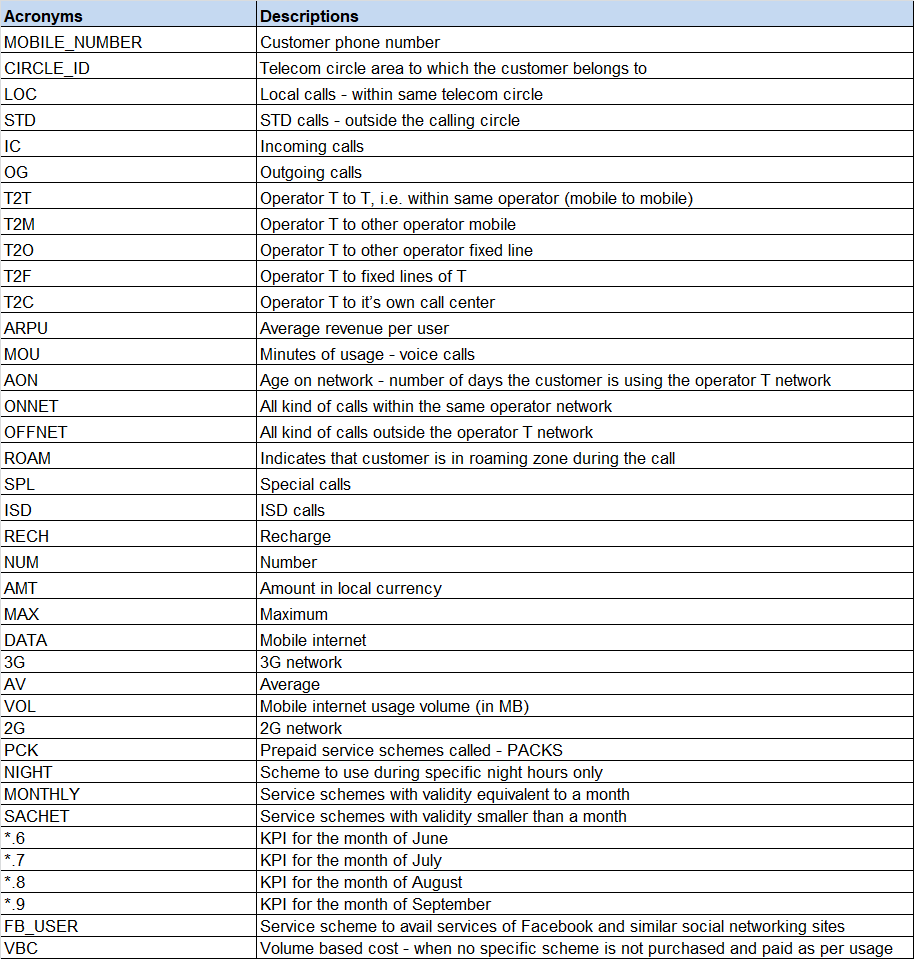

**A. Filter high-value customers -**

    Defination of high-value customers as follows:-
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile 
    of the average recharge amount in the first two months (the good phase).

#### Note: - High value customer has been filtered from follwing columns -
    
    'total_rech_amt_6' - Total recharge amount (talktime) for the month of 6
    'total_rech_amt_7' - Total recharge amount (talktime) for the month of 7
    
    'total_rech_data_6' - Count of recharge amount (data) for the month of 6
    'total_rech_data_7' - Count of recharge amount (data) for the month of 7
    
    'av_rech_amt_data_6' - Avg. of recharge amount (data) for the month of 6
    'av_rech_amt_data_7' - Avg. of recharge amount (data) for the month of 7

    Total recharge amount per month ==> total_rech_amt_mnth + (total_rech_data_mnth * av_rech_amt_data_mnth )

In [5]:
#replacing null to avoid compulational issue --
telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] =  telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.nan, 0, regex=True)

In [6]:
## Creating total amount KPI for Data:-

telecom_data['total_rech_amt_data_6'] = telecom_data.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
telecom_data['total_rech_amt_data_7'] = telecom_data.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [7]:
## Creating average amount KPI for data + talktime:-

telecom_data['avg_rech_amt_6_7'] = telecom_data.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

#### Decile Analysis:-
    We have to choose customers belonging to 70 percentile and above

In [8]:
telecom_data['avg_rech_amt_6_7'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
10%         60.000000
20%        108.500000
30%        155.000000
40%        209.500000
50%        275.000000
60%        360.000000
70%        478.000000
80%        656.500000
90%       1028.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [9]:
telecom_data['avg_rech_decile'] = pd.qcut(telecom_data['avg_rech_amt_6_7'], 10, labels=False)

In [10]:
##Choosing customers belonging to 70 percentile and above
telecom_data_high_value = telecom_data[telecom_data.avg_rech_decile >= 7 ]

In [11]:
telecom_data_high_value[['mobile_number']].count()

mobile_number    29953
dtype: int64

   We have filtered out **29.9K** high value customers - we will be working on dataset - **telecom_data_high_value**

**B. Creating KPI -**


**Frequency**

In [12]:
def churnfreqrec(telecom_data_high_value):
    i = 0
    a = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    i = i+a
    b = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    i=i+b
    c = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    i=i+c
    d = np.where(telecom_data_high_value[['date_of_last_rech_9']].isnull(),0,1)
    i=i+d
    return i

In [14]:
telecom_data_high_value['Frequency_recharge'] = 0
telecom_data_high_value['Frequency_recharge'] = telecom_data_high_value.apply(churnfreqrec, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
def churnfreqdata(telecom_data_high_value):
    i = 0
    a = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    i = i+a
    b = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    i=i+b
    c = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    i=i+c
    d = np.where(telecom_data_high_value[['date_of_last_rech_9']].isnull(),0,1)
    i=i+d
    return i

In [16]:
telecom_data_high_value['Frequency_data_recharge'] = 0
telecom_data_high_value['Frequency_data_recharge'] = telecom_data_high_value.apply(churnfreqdata, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Recency -**

In [17]:
### Working with date variables

In [18]:
for variable in telecom_data_high_value.columns:
    if telecom_data_high_value[variable].dtype.name in ['object']:
        print (variable)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [19]:
## Reference data columns (refernce dates for last date of the month)

telecom_data_high_value['last_date_of_month_6'] = pd.to_datetime('6/30/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_7'] = pd.to_datetime('7/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_8'] = pd.to_datetime('8/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_9'] = pd.to_datetime('9/30/2014', format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [20]:
telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']] = telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']].replace('-', '/', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [21]:
telecom_data_high_value['date_of_last_rech_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_9'], format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [22]:
telecom_data_high_value['date_of_last_rech_data_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_9'], format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [23]:
##Recency Function ALl-
def churnrec(telecom_data_high_value):
    k=True
    a = np.where(telecom_data_high_value[['date_of_last_rech_9']].isnull(),0,1)
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if a == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_9'])
            break
        elif b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_9']  - telecom_data_high_value['date_of_last_rech_6'])
            break
    return no_of_Days

In [24]:
telecom_data_high_value['Recency_last_recharge'] = telecom_data_high_value.apply(churnrec, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
##Recency Function data -
def churnrecdata(telecom_data_high_value):
    k=True
    a = np.where(telecom_data_high_value[['date_of_last_rech_data_9']].isnull(),0,1)
    b = np.where(telecom_data_high_value[['date_of_last_rech_data_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_data_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_data_6']].isnull(),0,1)
    while True:
        if a == 1:
            no_of_Days = (telecom_data_high_value['date_of_last_rech_data_9']  - telecom_data_high_value['date_of_last_rech_data_9'])
            break
        elif b == 1:
            no_of_Days = (telecom_data_high_value['date_of_last_rech_data_9']  - telecom_data_high_value['date_of_last_rech_data_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['date_of_last_rech_data_9']  - telecom_data_high_value['date_of_last_rech_data_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['date_of_last_rech_data_9']  - telecom_data_high_value['date_of_last_rech_data_6'])
            break
    return no_of_Days

In [ ]:
#telecom_data_high_value['Recency_last_data_recharge'] = telecom_data_high_value.apply(churnrecdata, axis=1)

In [27]:
### Drop date variables -

In [28]:
telecom_data_high_value.drop(['last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8',
'last_date_of_month_9',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_9',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_data_9'],axis=1, inplace = True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


**B. Data Manipulation - **

In [29]:
##Dropping av_rech_amt_data_mnth column since we already have crtaed KPI for total.
##Dropping decile column since it is no longer necessary

telecom_data_high_value.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'avg_rech_decile'], axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


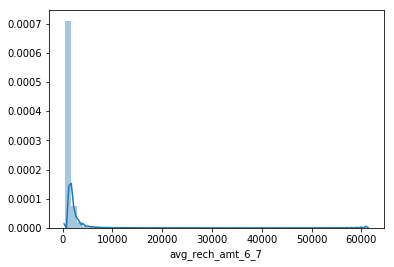

In [30]:
sns.distplot(telecom_data_high_value['avg_rech_amt_6_7'])
plt.show()

**Dropping columns with single vlaue diversity**
    
    circle_id        - single value '109'
    
**Replacing NULL value with '1':-**
    
    Categorical levels:-
    loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
    
    '0' - signifies have done some calls per user (loc/std/mou).
    '1' - signifies have done none. (28 customers no loc_og or std_og or loc_ic).

In [31]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].nunique()

circle_id         1
loc_og_t2o_mou    1
std_og_t2o_mou    1
loc_ic_t2o_mou    1
dtype: int64

In [32]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].isnull().any()

circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
dtype: bool

In [33]:
## Dropping circle id
telecom_data_high_value.drop( 'circle_id', axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
##replacing null in 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'

telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].replace(np.nan, 1, regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


**Creating seperate List for categorical and numeric variables**

In [35]:
cat_list = ['loc_og_t2o_mou' ,'std_og_t2o_mou' ,'loc_ic_t2o_mou', 'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9', 'monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_2g_9', 'sachet_2g_6','sachet_2g_7','sachet_2g_8', 'sachet_2g_9', 'monthly_3g_6','monthly_3g_7','monthly_3g_8','monthly_3g_9','sachet_3g_6','sachet_3g_7','sachet_3g_8','sachet_3g_9', 'fb_user_6','fb_user_7','fb_user_8','fb_user_9']
cat_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [ ]:
numlist = []
for x in telecom_data_high_value.columns:
    if x not in(cat_list):
        numlist.append(x)
numlist

**Working with Numerical variables**

In [37]:
#Creating a dataset out of the SUM of NULLs
no_of_null = pd.DataFrame(telecom_data_high_value[numlist].isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [38]:
#Taking columns where > 0.7 percentile rows are NA:-
no_of_null[no_of_null['NoOfNulls'] > 0]

,Attributes,NoOfNulls
5,onnet_mou_6,542
6,onnet_mou_7,536
7,onnet_mou_8,1172
8,onnet_mou_9,1898
9,offnet_mou_6,542
10,offnet_mou_7,536
11,offnet_mou_8,1172
12,offnet_mou_9,1898
13,roam_ic_mou_6,542
14,roam_ic_mou_7,536


In [39]:
## Replacing Numeric 'NaN' values as ZEROs

In [40]:
telecom_data_high_value[numlist] = telecom_data_high_value[numlist].replace(np.nan, 0, regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [41]:
telecom_data_high_value[numlist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 189 entries, mobile_number to Recency_last_recharge
dtypes: float64(168), int32(2), int64(18), timedelta64[ns](1)
memory usage: 43.2 MB


In [49]:
#Handling Outliers - Numeric variables
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.90))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [50]:
#removing mobile_number
num_list_final = list(set(numlist) - set(['mobile_number']))

In [51]:
telecom_data_high_value[num_list_final]=telecom_data_high_value[num_list_final].apply(lambda x: outlier_capping(x))

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


**Working with categorical varaibles**

In [52]:
telecom_data_high_value[cat_list].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,...,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,...,1,0,0,0,0,0,1.0,1.0,1.0,NaN
7,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0,1,0,...,0,0,0,0,0,0,NaN,1.0,1.0,NaN
21,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
23,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0,0,0,...,1,1,0,0,1,0,NaN,1.0,1.0,1.0


In [53]:
telecom_data_high_value[cat_list].isnull().any()

loc_og_t2o_mou      False
std_og_t2o_mou      False
loc_ic_t2o_mou      False
night_pck_user_6     True
night_pck_user_7     True
night_pck_user_8     True
night_pck_user_9     True
monthly_2g_6        False
monthly_2g_7        False
monthly_2g_8        False
monthly_2g_9        False
sachet_2g_6         False
sachet_2g_7         False
sachet_2g_8         False
sachet_2g_9         False
monthly_3g_6        False
monthly_3g_7        False
monthly_3g_8        False
monthly_3g_9        False
sachet_3g_6         False
sachet_3g_7         False
sachet_3g_8         False
sachet_3g_9         False
fb_user_6            True
fb_user_7            True
fb_user_8            True
fb_user_9            True
dtype: bool

In [54]:
#missing values can be imputed with '-1' where -1 can be treated as a new category. 
telecom_data_high_value[cat_list] = telecom_data_high_value[cat_list].replace(np.nan, -1, regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Churn Indicator - 

In [55]:
def churnind(telecom_data_high_value):
    if ((telecom_data_high_value.total_ic_mou_9 == 0) & (telecom_data_high_value.total_og_mou_9 == 0) & (telecom_data_high_value.vol_2g_mb_9 == 0) & (telecom_data_high_value.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

In [56]:
telecom_data_high_value['CHURN_IND'] = telecom_data_high_value.apply(churnind, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
telecom_data_high_value.groupby('CHURN_IND').size()

CHURN_IND
0    27520
1     2433
dtype: int64

In [58]:
telecom_tobedel = telecom_data_high_value.filter(regex='_9')
telecom_tobedel.columns

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user

In [59]:
telecom_data_new  = telecom_data_high_value.drop(telecom_tobedel.columns, axis=1)

In [60]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 166 entries, mobile_number to CHURN_IND
dtypes: float64(151), int64(14), timedelta64[ns](1)
memory usage: 38.2 MB
